In [1]:
import numpy as np

In [3]:
mas = np.array([[1, 1, 1, 1], [-2, 1, 2, 3], [4, 1, 4, 9], [-8, 1, 8, 27]])
mas_inv = np.linalg.inv(mas)

In [9]:
mas_inv @ np.array([0, 0, 2, 6])

array([ 0.1,  0. , -0.5,  0.4])

In [227]:
import math

In [290]:
PI = math.pi
step = 9

наша функція

In [291]:
def target_function(x):
    return x * (PI**2 - x**2)

функція підрахунку інтегралу

In [292]:
def simpson_integral(func, left, right, num):
    h = (right - left) / num
    res = 0
    for i in range(num):
        l, r = left + i * h, left + (i + 1) * h
        res += func(l) + 4 * func((l + r) / 2) + func(r)
    return h / 6.0 * res

рахуємо коефіціенти фурє

In [293]:
bias = simpson_integral(lambda x: target_function(x) / (2.0 * PI), -PI, PI, 100)
sins = [simpson_integral(lambda x: target_function(x) / PI * np.sin(i * x), -PI, PI, 100) for i in range(1, step + 1)]
coss = [simpson_integral(lambda x: target_function(x) / PI * np.cos(i * x), -PI, PI, 100) for i in range(1, step + 1)]

функція яка по коефіціентах фурє рахує наближення функції

In [294]:
def trigonometric_polynom(x):
    res = bias
    for i in range(step):
        res += sins[i] * np.sin((i + 1) * x)
    for i in range(step):
        res += coss[i] * np.sin((i + 1) * x)
    return res

In [295]:
import matplotlib.pyplot as plt

In [296]:
def print_func(func, label=None):
    X= np.linspace(-PI, PI, 100)
    plt.plot(X, [func(i) for i in X], label=label)

Дивлюсь наскільки похожі функції

(None, None)

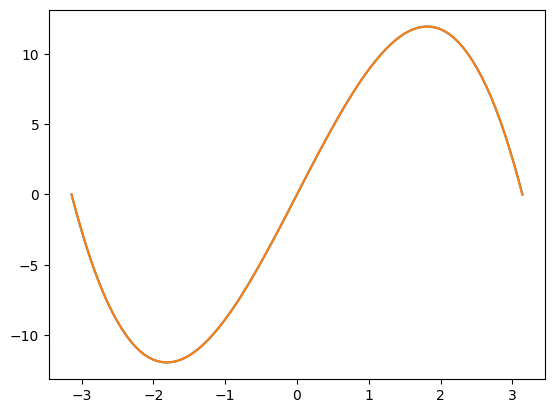

In [298]:
print_func(target_function), print_func(trigonometric_polynom)

ряд фурє

In [302]:
print(f"{bias}")
for i in range(step):
    print(f" + {sins[i]} * sin({i+1}x)" + f" + {coss[i]} * sin({i+1}x)")

-4.510976590757831e-16
 + 12.0000001948945 * sin(1x) + -1.557914595777189e-16 * sin(1x)
 + -1.5000003902472991 * sin(2x) + -8.928943354902098e-16 * sin(2x)
 + 0.4444450309631521 * sin(3x) + -7.905835262152899e-16 * sin(3x)
 + -0.18750078417302607 * sin(4x) + 6.510687862949446e-16 * sin(4x)
 + 0.09600098368061717 * sin(5x) + 1.1161179193627623e-16 * sin(5x)
 + -0.055556741075533544 * sin(6x) + -1.5346621391237982e-15 * sin(6x)
 + 0.034986812920410074 * sin(7x) + -8.556904048447844e-16 * sin(7x)
 + -0.023439098161622207 * sin(8x) + 9.859041621037733e-16 * sin(8x)
 + 0.016462715331077037 * sin(9x) + -4.696996243984958e-16 * sin(9x)
